In [1]:
from wordcloud import WordCloud
import re
import pandas as pd
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os as os
import seaborn as sns
import warnings
import csv
from PIL import Image

In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 5]
warnings.filterwarnings("ignore", category=FutureWarning)
%config InlineBackend.figure_format = 'retina'

In [4]:
data = pd.read_csv('data_cleaned.csv')

In [5]:
#valid = pd.read_csv('val.csv')

In [6]:
def word_count(data):
    return data.apply(lambda x: len(str(x).split()) )

def char_count(data):
    return data.apply(len)

In [7]:
def word_density(x, y):
    density = x/y
    return density

In [8]:
data['word_count_plot'] = word_count(data['plot_synopsis'])
data['character_count_plot'] = char_count(data['plot_synopsis'])
data['word_density_plot'] = word_density(data['character_count_plot'], data['word_count_plot'])
data['character_count_title'] = char_count(data['title'])

In [9]:
data['word_count_title'] = word_count(data['title'])

In [10]:
data['word_density_title'] = word_density(data['character_count_title'], data['word_count_title'])


In [11]:
data.head()

,Unnamed: 0,imdb_id,title,plot_synopsis,tags,split,synopsis_source,count,word_count_plot,character_count_plot,word_density_plot,character_count_title,word_count_title,word_density_title
0,7414,tt1710626,zenobureido,set and charact the set of xenoblad chronicl o...,revenge,val,wikipedia,1,1369,7167,5.235208,11,1,11.000000
1,11142,tt0119642,mean gun,vincent moon ice-t is the leader of a crime sy...,revenge action murder violence flashback,val,wikipedia,5,528,2639,4.998106,8,2,4.000000
2,11066,tt0183659,pollock,the film begin show the abstract expressionist...,tragedy romantic,val,wikipedia,2,797,4104,5.149310,7,1,7.000000
3,11062,tt0250494,legal blond,fashion merchandis student ell wood is taken t...,entertaining cute comedy murder stupid,val,wikipedia,5,467,2506,5.366167,11,2,5.500000
4,11060,tt0085176,antoni and cleopatra,mark antoni – one of the triumvir of the roman...,tragedy,val,wikipedia,1,1098,5852,5.329690,20,3,6.666667


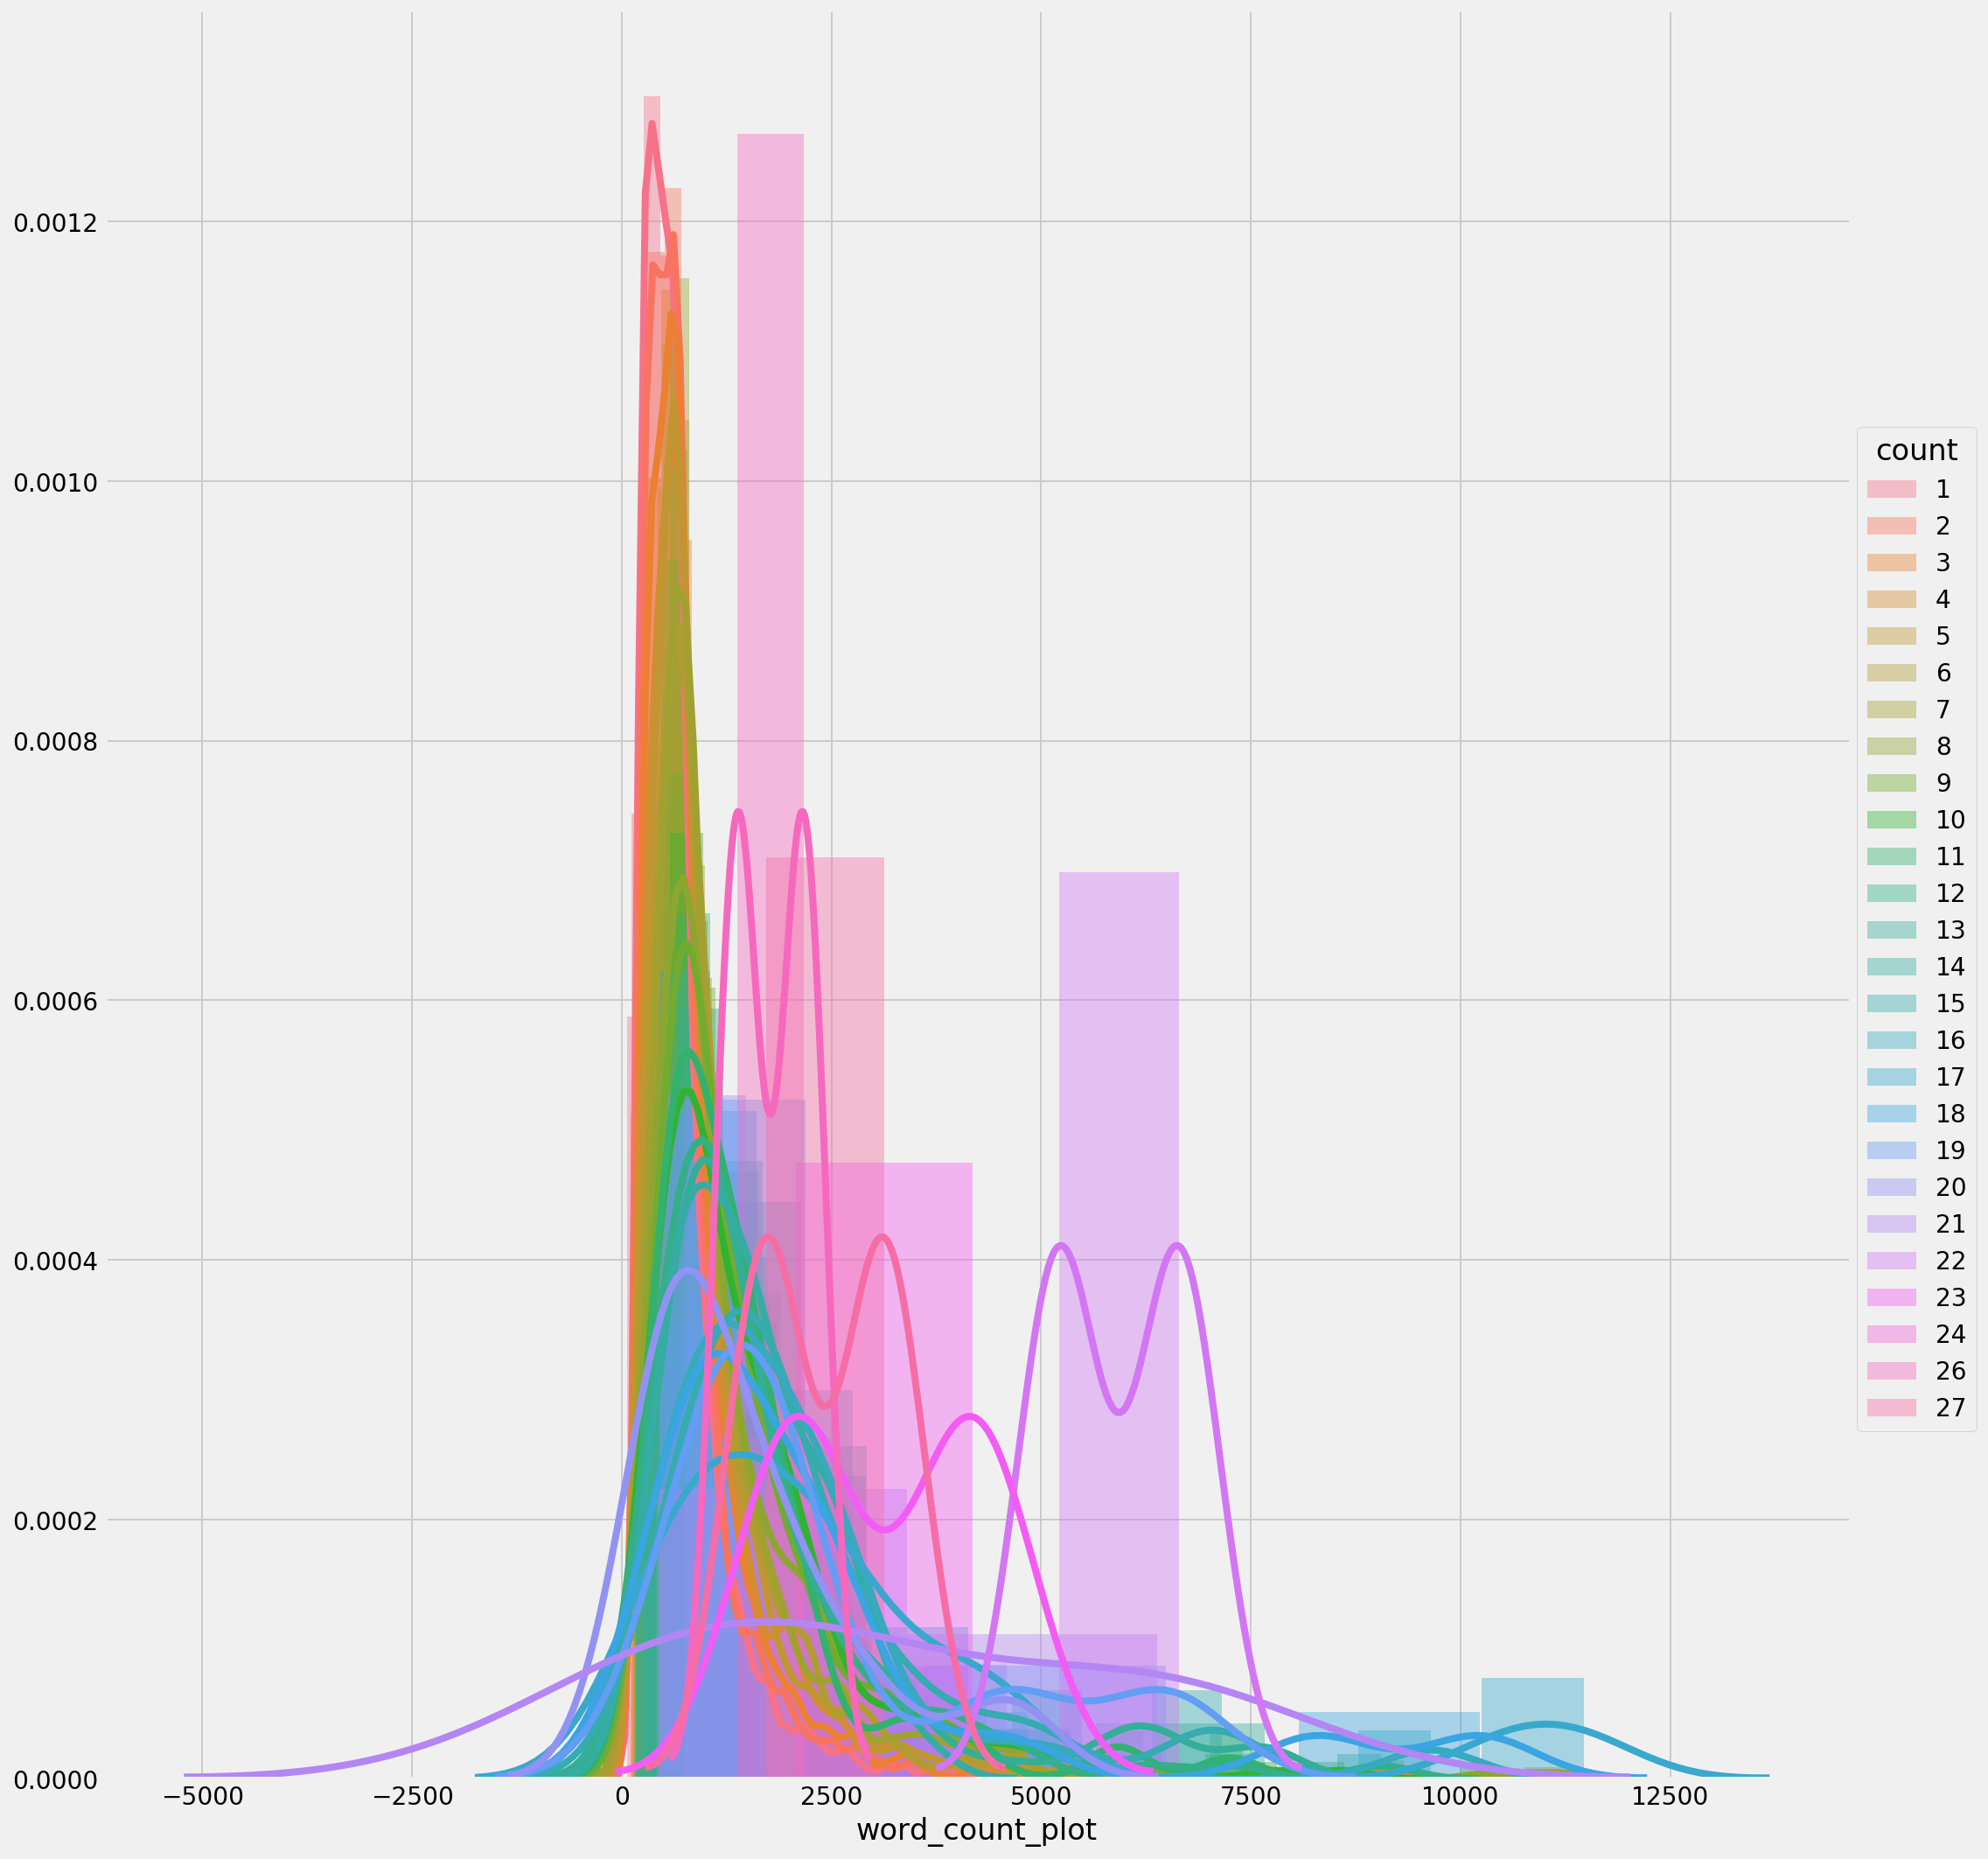

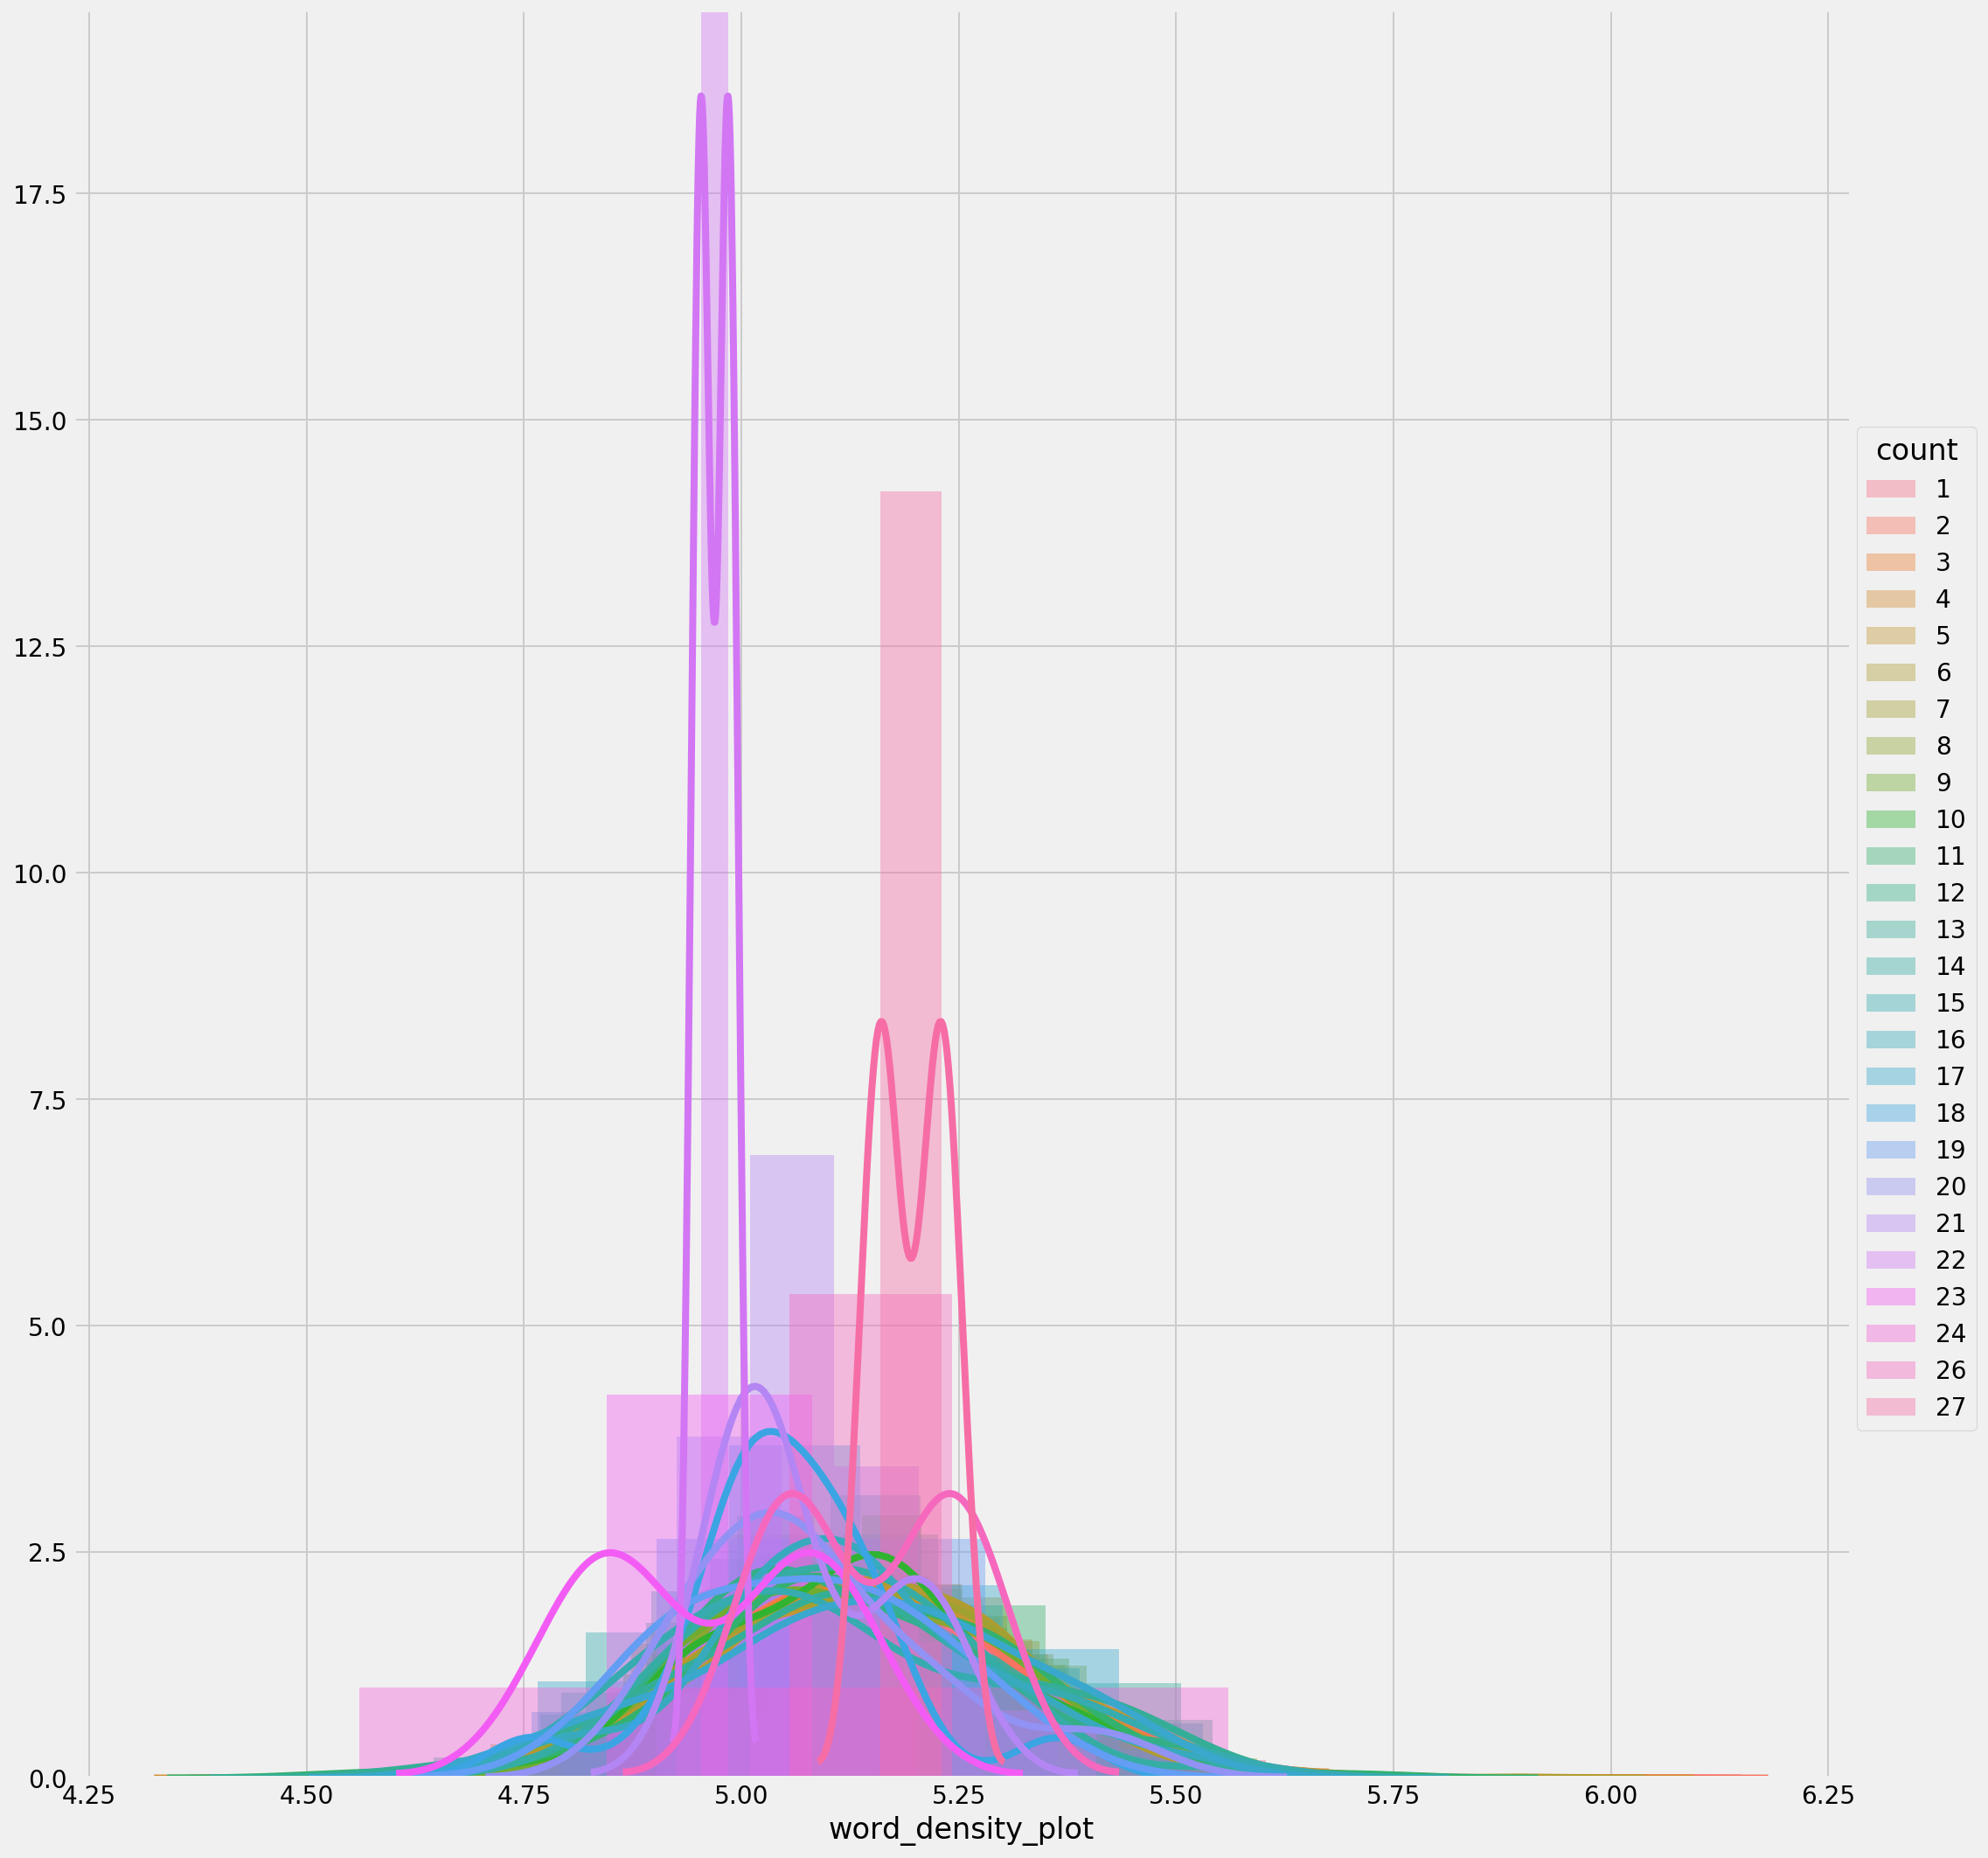

In [12]:
import warnings
warnings.filterwarnings("ignore", category= UserWarning) 
warnings.filterwarnings("ignore", category= RuntimeWarning) 


sns.FacetGrid(data, hue="count", size=15) \
   .map(sns.distplot, "word_count_plot") \
   .add_legend();
plt.show();

sns.FacetGrid(data, hue="count", size=15) \
   .map(sns.distplot, "word_density_plot") \
   .add_legend();
plt.show();

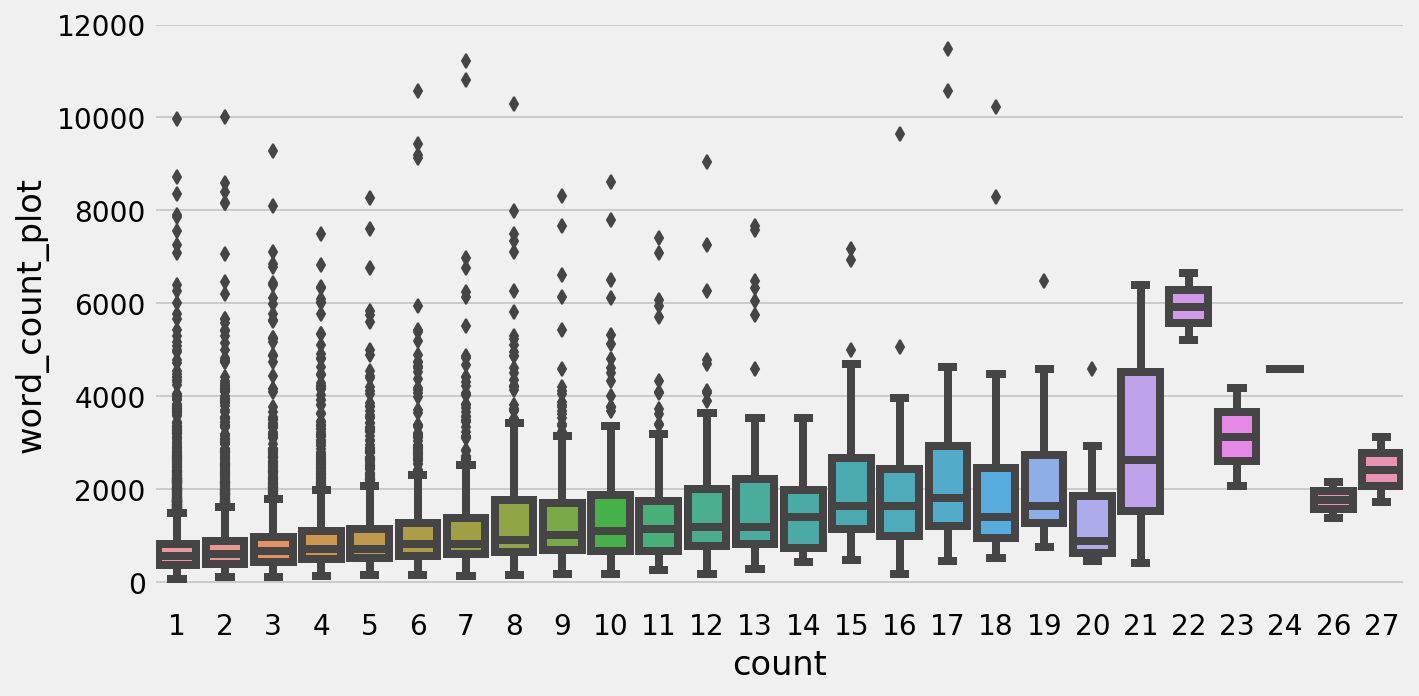

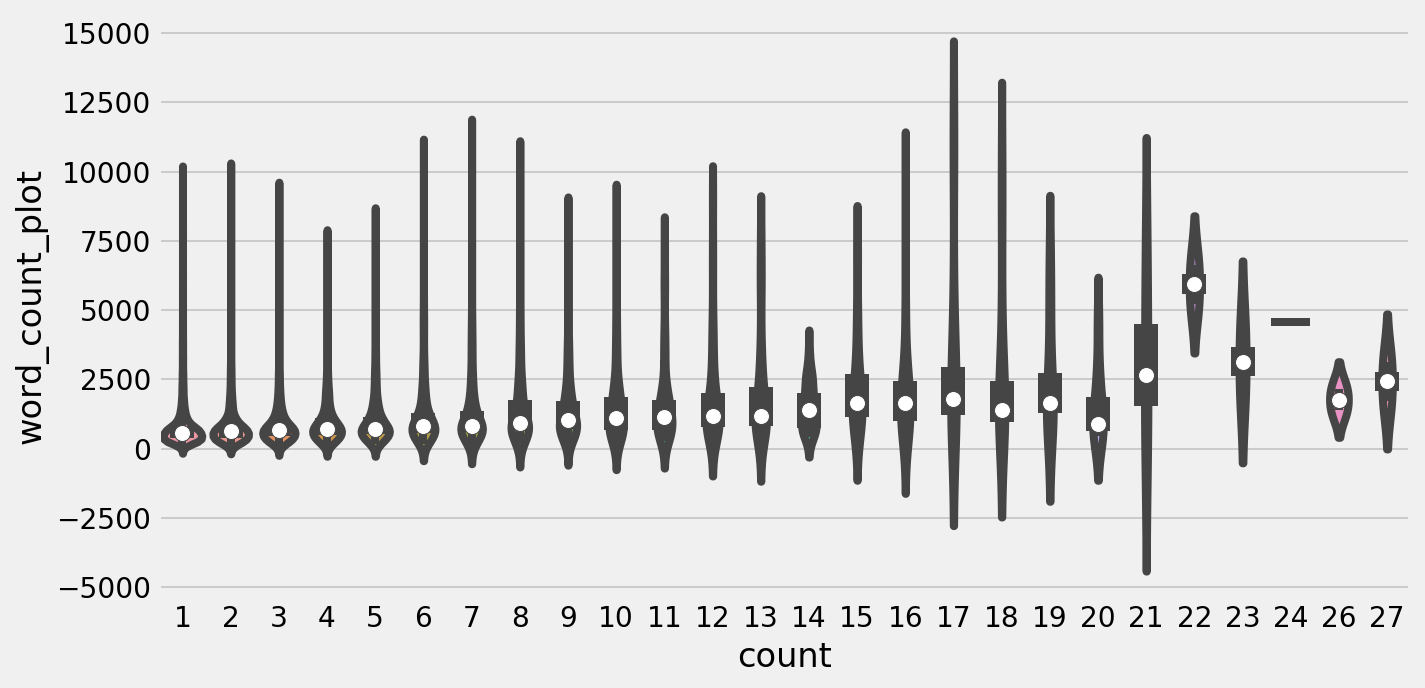

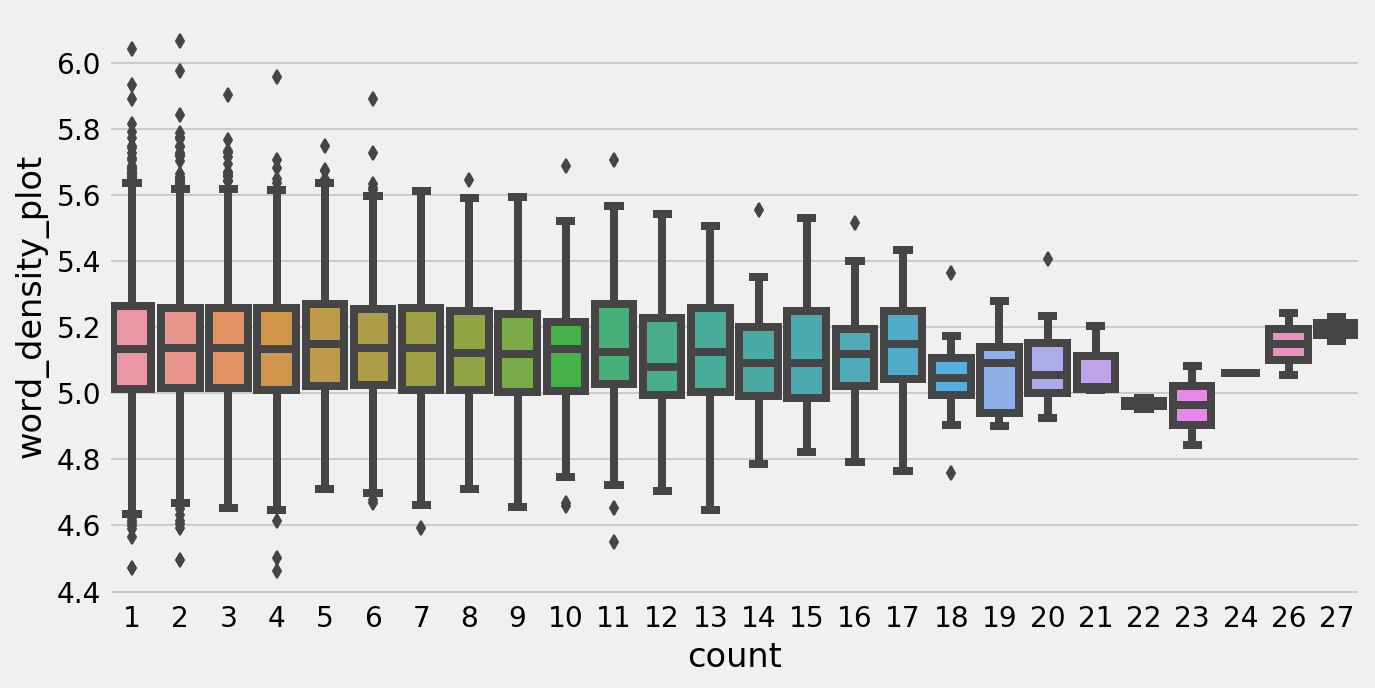

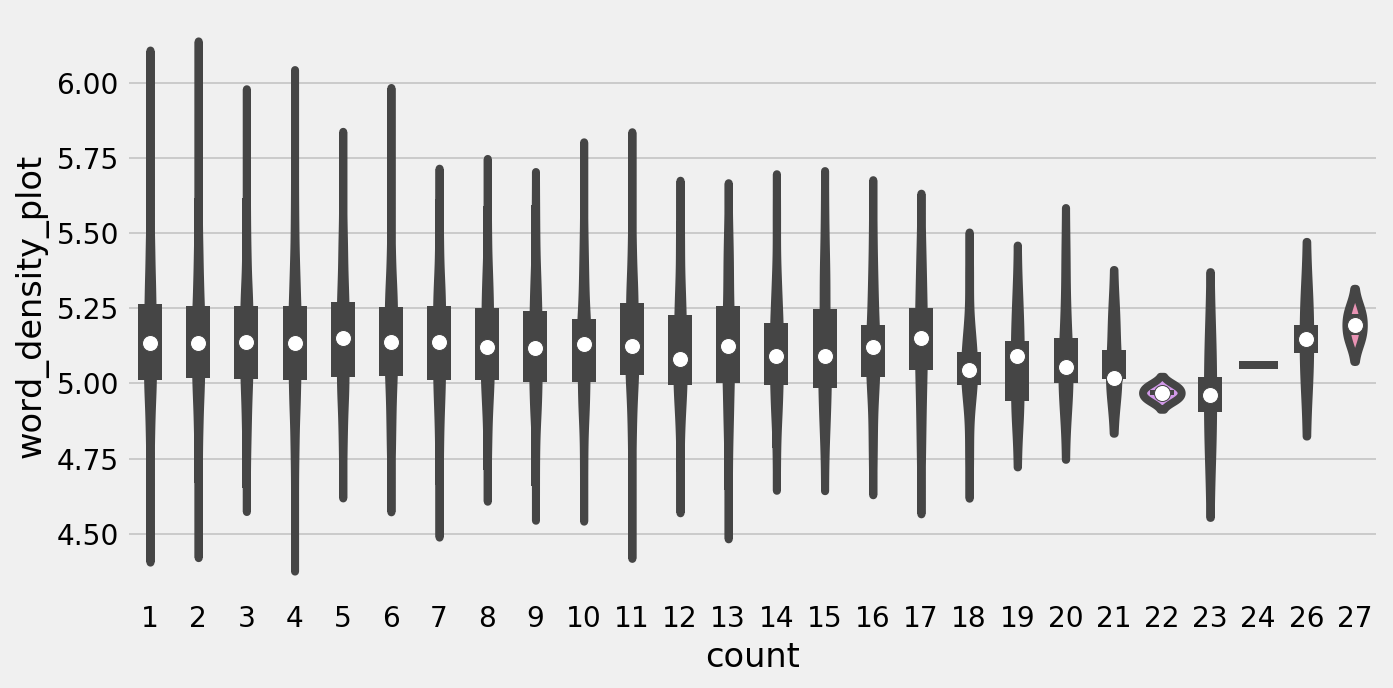

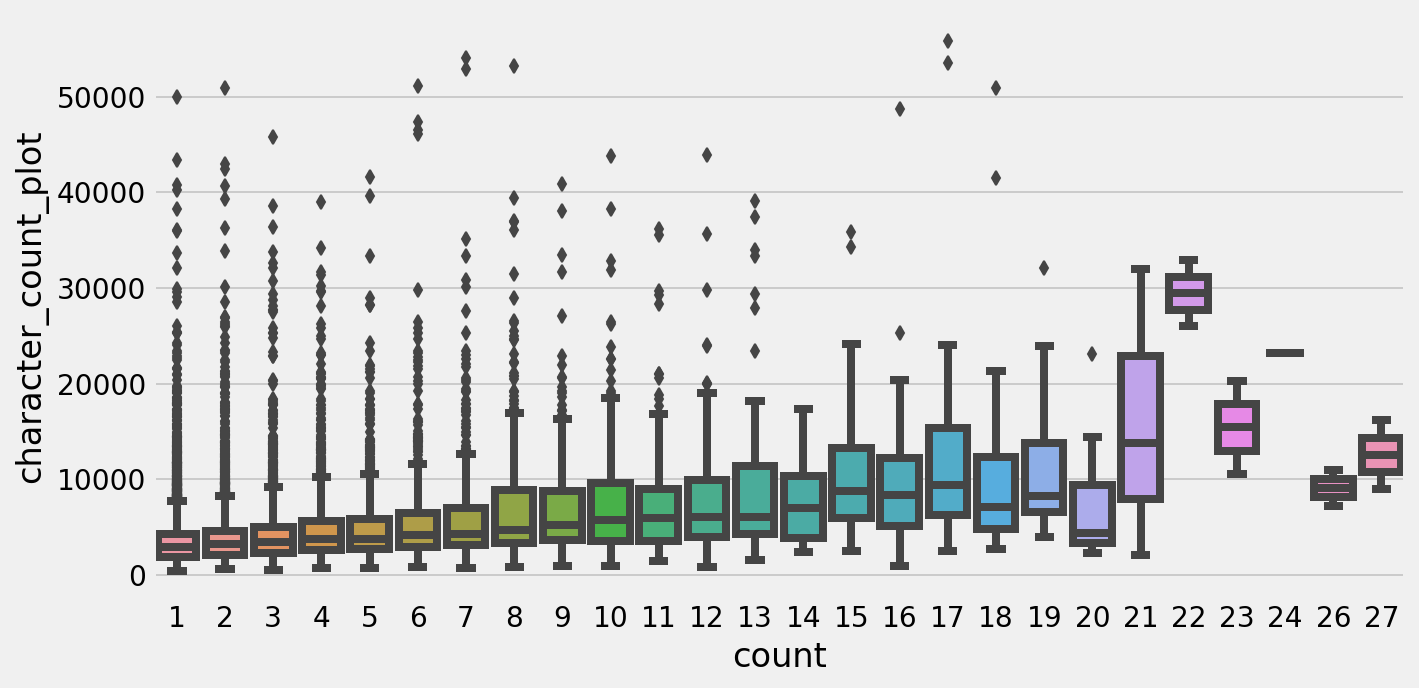

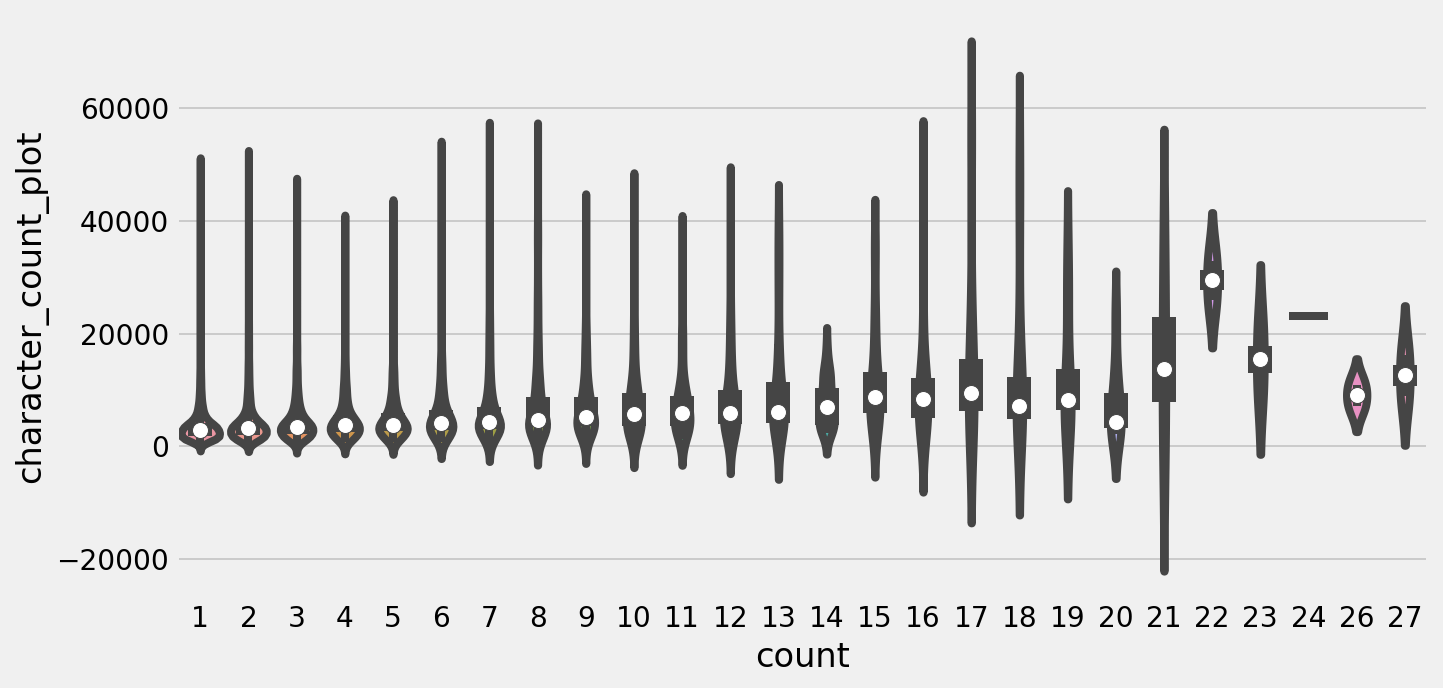

In [13]:
def box_violin(x,y, data):
    sns.boxplot(x=x,y= y, data = data)
    plt.show()

    sns.violinplot(x = x,y = y, data = data)
    plt.show()
    
    
box_violin( 'count', 'word_count_plot', data = data)
box_violin( 'count', 'word_density_plot', data = data)
box_violin( 'count', 'character_count_plot', data = data)


In [14]:
# box_violin( 'count', 'word_count_plot', data = test)
# box_violin( 'count', 'word_density_plot', data = test)
# box_violin( 'count', 'character_count_plot', data = test)

In [15]:
# box_violin( 'count', 'word_count_plot', data = val)
# box_violin( 'count', 'word_density_plot', data = val)
# box_violin( 'count', 'character_count_plot', data = val)

In [16]:
data.to_csv('data_featurised_new.csv', index=True)

In [17]:
data.head()

,Unnamed: 0,imdb_id,title,plot_synopsis,tags,split,synopsis_source,count,word_count_plot,character_count_plot,word_density_plot,character_count_title,word_count_title,word_density_title
0,7414,tt1710626,zenobureido,set and charact the set of xenoblad chronicl o...,revenge,val,wikipedia,1,1369,7167,5.235208,11,1,11.000000
1,11142,tt0119642,mean gun,vincent moon ice-t is the leader of a crime sy...,revenge action murder violence flashback,val,wikipedia,5,528,2639,4.998106,8,2,4.000000
2,11066,tt0183659,pollock,the film begin show the abstract expressionist...,tragedy romantic,val,wikipedia,2,797,4104,5.149310,7,1,7.000000
3,11062,tt0250494,legal blond,fashion merchandis student ell wood is taken t...,entertaining cute comedy murder stupid,val,wikipedia,5,467,2506,5.366167,11,2,5.500000
4,11060,tt0085176,antoni and cleopatra,mark antoni – one of the triumvir of the roman...,tragedy,val,wikipedia,1,1098,5852,5.329690,20,3,6.666667


In [12]:
data.shape

(14828, 14)

In [13]:
from textblob import TextBlob

pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

data['noun_count'] = data['plot_synopsis'].apply(lambda x: pos_check(x, 'noun'))
data['verb_count'] = data['plot_synopsis'].apply(lambda x: pos_check(x, 'verb'))
data['adj_count'] = data['plot_synopsis'].apply(lambda x: pos_check(x, 'adj'))
data['adv_count'] = data['plot_synopsis'].apply(lambda x: pos_check(x, 'adv'))
data['pron_count'] = data['plot_synopsis'].apply(lambda x: pos_check(x, 'pron'))

In [17]:
data.head()

,Unnamed: 0,imdb_id,title,plot_synopsis,tags,split,synopsis_source,count,word_count_plot,character_count_plot,word_density_plot,character_count_title,word_count_title,word_density_title,noun_count,verb_count,adj_count,adv_count,pron_count
0,7414,tt1710626,zenobureido,set and charact the set of xenoblad chronicl o...,revenge,val,wikipedia,1,1369,7167,5.235208,11,1,11.000000,450,203,127,34,71
1,11142,tt0119642,mean gun,vincent moon ice-t is the leader of a crime sy...,revenge action murder violence flashback,val,wikipedia,5,528,2639,4.998106,8,2,4.000000,147,99,32,15,47
2,11066,tt0183659,pollock,the film begin show the abstract expressionist...,tragedy romantic,val,wikipedia,2,797,4104,5.149310,7,1,7.000000,260,124,71,34,57
3,11062,tt0250494,legal blond,fashion merchandis student ell wood is taken t...,entertaining cute comedy murder stupid,val,wikipedia,5,467,2506,5.366167,11,2,5.500000,159,82,34,15,53
4,11060,tt0085176,antoni and cleopatra,mark antoni – one of the triumvir of the roman...,tragedy,val,wikipedia,1,1098,5852,5.329690,20,3,6.666667,302,169,115,40,126


In [15]:
data.to_csv('use_it_dude.csv', index=True)

In [16]:
data.shape

(14828, 19)

In [18]:
data['plot_synopsis'][4]

'mark antoni – one of the triumvir of the roman republ along with octavius and lepidus – has neglect his soldier duti after be beguil by egypt queen cleopatra he ignor rome domest problem includ the fact that his third wife fulvia rebel against octavius and then die octavius call antoni back to rome from alexandria to help him fight against sextus pompey menecr and mena three notori pirat of the mediterranean at alexandria cleopatra beg antoni not to go and though he repeat affirm his deep passion love for her he eventu leav the triumvir meet in rome where antoni and octavius put to rest for now their disagr octavius general agrippa suggest that antoni should marri octaviuss sister octavia in order to cement the friend bond between the two men antoni accept antoni lieuten enobarbus though know that octavia can never satisfi him after cleopatra in a famous passag he describ cleopatra charm : age can not wither her nor custom stale her infinit varieti : other women cloy the appetit they 

In [19]:
data['noun_count'][4]

302